In [278]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #import the transformer
import matplotlib.pyplot as plt 
from sklearn.metrics import pairwise_distances
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 100)

In [279]:
#imorting csv
spotify_5000_df = pd.read_csv('df_audio_features_5000.csv') 
spotify_5000_df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA


In [280]:
spotify_5000_df.columns

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [281]:
# remove special characters from columns names
spotify_5000_df.columns = spotify_5000_df.columns.str.replace(' ', '')
spotify_5000_df.columns


Index(['name', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'duration_ms', 'time_signature', 'id',
       'html'],
      dtype='object')

In [282]:
spotify_5000_df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA


In [283]:
# selecting numeric parts of the columns
spotify_5000_num_df = spotify_5000_df.iloc[:, 2:14]  
spotify_5000_num_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type
0,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,
1,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,
2,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,
3,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,
4,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,


In [284]:
spotify_5000_num_df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type'],
      dtype='object')

In [285]:
# further dropping unnecessary columns
spotify_5000_num_df = spotify_5000_num_df.drop(['key','mode','type'], axis=1)
spotify_5000_num_df.head()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.658,0.2590,-13.141,0.0705,0.694,0.000059,0.975,0.306,110.376
1,0.742,0.3990,-12.646,0.0346,0.217,0.000002,0.107,0.693,125.039
2,0.851,0.7300,-11.048,0.3470,0.453,0.000063,0.124,0.905,93.698
3,0.705,0.0502,-18.115,0.0471,0.879,0.000041,0.386,0.524,106.802
4,0.651,0.1190,-19.807,0.0380,0.916,0.000343,0.104,0.402,120.941


In [286]:
#scaling my dataframe using MinMax transformer
scaled_spotify_5000 = MinMaxScaler().fit_transform(spotify_5000_num_df)
scaled_spotify_5000_df = pd.DataFrame(scaled_spotify_5000, columns=spotify_5000_num_df.columns, index=spotify_5000_num_df.index)
scaled_spotify_5000_df.head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
1,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
2,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
3,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
4,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


In [287]:
# Calculating the Euclidian distance between the songs  
song_eucli_dist = pd.DataFrame(pairwise_distances(scaled_spotify_5000_df), columns=spotify_5000_df['name'], index=spotify_5000_df['name'])
song_eucli_dist.head() 


name,Se Eu Quiser Falar Com Deus,Saudade De Bahia,"Canta Canta, Minha Gente",Mulher Eu Sei,Rosa Morena,Desafinado,Madalena,O Meu Amor É Glòria,Brigas Nunca Mais,Previsao,...,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...","Pines Of Rome, P. 141: 3. The Pines Of The Janiculum","Don Giovanni, K.527: Overture","Music for Strings, Percussion and Celesta, BB 114: II. Allegro",A Flock Descends Into The Pentagonal Garden,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49","Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique","Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)","Serenade For Strings In E, Op.22, B. 52: 1. Moderato","Ravel: Boléro, M. 81"
name,,,,,,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,0.000000,1.091129,1.237497e+00,7.021868e-01,0.934392,0.974123,1.082114,0.903596,1.032894,1.133062,...,1.053827,1.469630,1.289093,1.374196,1.375511,1.323203,1.195360,1.630113,1.261703,0.984187
Saudade De Bahia,1.091129,0.000000,6.024680e-01,8.304435e-01,0.825280,0.879351,0.895510,0.968707,0.335606,0.761883,...,1.076525,1.542346,1.241078,1.338336,1.463649,1.381570,1.233895,1.709390,1.346159,1.094809
"Canta Canta, Minha Gente",1.237497,0.602468,2.980232e-08,1.005827e+00,1.021407,1.073497,0.948422,0.707366,0.617281,0.690105,...,1.340423,1.744522,1.413522,1.504064,1.655175,1.583217,1.462972,1.895554,1.567466,1.314958
Mulher Eu Sei,0.702187,0.830443,1.005827e+00,2.980232e-08,0.333812,0.465563,0.567053,0.958296,0.808778,0.971439,...,0.877104,1.229272,1.017369,1.074691,1.136051,1.060771,0.916984,1.398895,0.991223,0.721065
Rosa Morena,0.934392,0.825280,1.021407e+00,3.338116e-01,0.000000,0.274125,0.543356,1.097178,0.770203,0.911177,...,0.745315,1.117041,0.932239,0.980807,1.020296,0.942848,0.769504,1.300777,0.877156,0.700656


In [288]:
#checking the correlation between each feature
correlation = scaled_spotify_5000_df.corr()
correlation.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,0.040491,0.358328,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585
energy,0.040491,1.000000,0.786860,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617
loudness,0.358328,0.786860,1.000000,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228
speechiness,0.036121,0.303940,0.233609,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255
acousticness,-0.111151,-0.850469,-0.697709,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994


<AxesSubplot:>

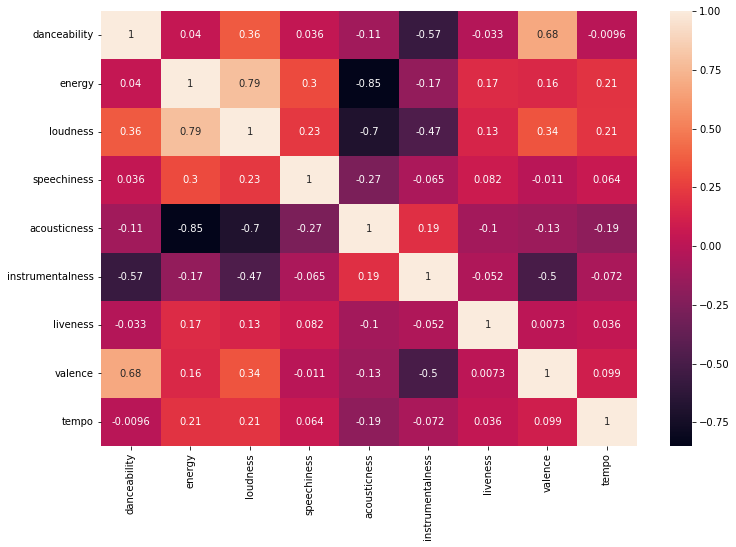

In [289]:
#plotting the heatmap of the correlation 
plt.subplots(figsize=(12, 8))
sns.heatmap(correlation, annot=True)

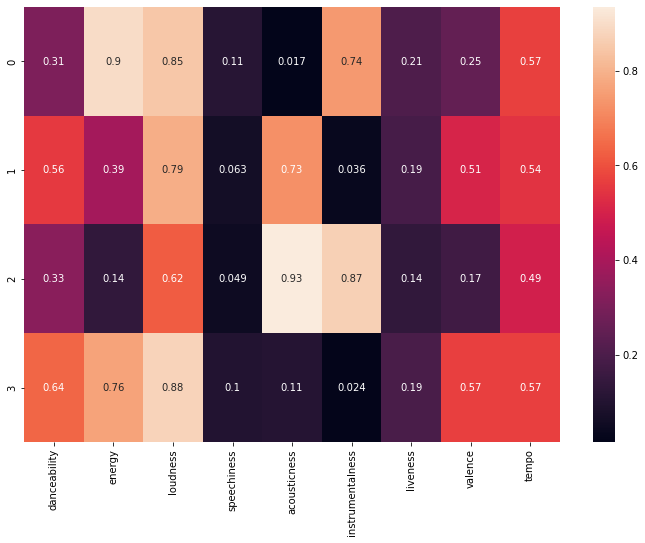

In [290]:
# plotting the heatmap of clusters against the features
plt.subplots(figsize=(12, 8))
sns.heatmap(centroids_df, annot=True)
plt.show()

##  clustering using kmeans 

In [291]:
# initialize the model
kmeans = KMeans(n_clusters=4) 
# fit the model to the data using your scaled data
scaled_kmeans = kmeans.fit(scaled_spotify_5000_df) 


In [292]:
scaled_kmeans

KMeans(n_clusters=4)

In [293]:
#Obtain the cluster output
clusters = kmeans.predict(scaled_spotify_5000_df) 
clusters

array([1, 0, 0, ..., 2, 2, 2], dtype=int32)

In [294]:
#attach cluster output to original dataframe
spotify_5000_df["cluster"] = clusters
spotify_5000_df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR1tcGFq7,1
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwSJwTm5Zq,0
2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwnkn5PJYs,0
3,Mulher Eu Sei ...,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67WsAxryPFs,1
4,Rosa Morena ...,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkIPPdp0eA,1


In [295]:
# finding the average value that each cluster has for each feature
spotify_5000_df.groupby(by="cluster").mean() 


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.618134,0.763850,5.349945,-6.266833,0.624955,0.092571,0.109289,0.023332,0.190526,0.557687,121.376356,229148.134958,3.972354
1,0.538576,0.392167,5.087699,-11.686411,0.706150,0.058203,0.723005,0.035563,0.184638,0.498432,115.866026,230398.947608,3.871298
2,0.322893,0.135196,5.095238,-21.963373,0.623974,0.045325,0.930225,0.853834,0.134756,0.169222,105.348785,337202.688013,3.683087
3,0.298786,0.895827,5.235235,-8.029088,0.665666,0.102359,0.016652,0.732541,0.202594,0.248716,122.077260,260500.535536,3.873874


## clustering the song with KMEANS

In [296]:
kmeans.cluster_centers_

array([[0.63922803, 0.76384973, 0.87596047, 0.10083936, 0.109728  ,
        0.02368708, 0.19303521, 0.56617938, 0.56720574],
       [0.55695585, 0.39216705, 0.78761026, 0.06340192, 0.72590819,
        0.03610478, 0.18707007, 0.50602246, 0.54145533],
       [0.3339117 , 0.13519644, 0.62007478, 0.04937413, 0.9339608 ,
        0.8668367 , 0.13653123, 0.17179915, 0.49230705],
       [0.30898282, 0.89582683, 0.84723211, 0.11150181, 0.01671861,
        0.74369659, 0.20526241, 0.25250316, 0.57048115]])

In [297]:
#accessing our centroids
centroids = kmeans.cluster_centers_
centroids
centroids_df = pd.DataFrame(centroids)

In [298]:
centroids_df

,0,1,2,3,4,5,6,7,8
0,0.639228,0.763850,0.875960,0.100839,0.109728,0.023687,0.193035,0.566179,0.567206
1,0.556956,0.392167,0.787610,0.063402,0.725908,0.036105,0.187070,0.506022,0.541455
2,0.333912,0.135196,0.620075,0.049374,0.933961,0.866837,0.136531,0.171799,0.492307
3,0.308983,0.895827,0.847232,0.111502,0.016719,0.743697,0.205262,0.252503,0.570481


In [299]:
#assigning the df to its column names.
centroids_df.columns = ['danceability', 'energy', 'loudness','speechiness','acousticness','instrumentalness', 'liveness', 'valence', 'tempo']
centroids_df 

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.639228,0.763850,0.875960,0.100839,0.109728,0.023687,0.193035,0.566179,0.567206
1,0.556956,0.392167,0.787610,0.063402,0.725908,0.036105,0.187070,0.506022,0.541455
2,0.333912,0.135196,0.620075,0.049374,0.933961,0.866837,0.136531,0.171799,0.492307
3,0.308983,0.895827,0.847232,0.111502,0.016719,0.743697,0.205262,0.252503,0.570481


In [300]:
#calculating the Euclidian distance between the clusters
cluster_eucli_dist = pd.DataFrame(pairwise_distances(scaled_spotify_5000_df), columns=spotify_5000_df['cluster'], index=spotify_5000_df['cluster']) 
cluster_eucli_dist.head() 


cluster,1,0,0,1,1,1,1,1,0,1,...,1,2,2,2,2,2,2,2,2,2
cluster,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.091129,1.237497e+00,7.021868e-01,0.934392,0.974123,1.082114,0.903596,1.032894,1.133062,...,1.053827,1.469630,1.289093,1.374196,1.375511,1.323203,1.195360,1.630113,1.261703,0.984187
0,1.091129,0.000000,6.024680e-01,8.304435e-01,0.825280,0.879351,0.895510,0.968707,0.335606,0.761883,...,1.076525,1.542346,1.241078,1.338336,1.463649,1.381570,1.233895,1.709390,1.346159,1.094809
0,1.237497,0.602468,2.980232e-08,1.005827e+00,1.021407,1.073497,0.948422,0.707366,0.617281,0.690105,...,1.340423,1.744522,1.413522,1.504064,1.655175,1.583217,1.462972,1.895554,1.567466,1.314958
1,0.702187,0.830443,1.005827e+00,2.980232e-08,0.333812,0.465563,0.567053,0.958296,0.808778,0.971439,...,0.877104,1.229272,1.017369,1.074691,1.136051,1.060771,0.916984,1.398895,0.991223,0.721065
1,0.934392,0.825280,1.021407e+00,3.338116e-01,0.000000,0.274125,0.543356,1.097178,0.770203,0.911177,...,0.745315,1.117041,0.932239,0.980807,1.020296,0.942848,0.769504,1.300777,0.877156,0.700656


### EXPLORING KMEANS RESULTS

In [315]:
scaled_spotify_sample_df = scaled_spotify_5000_df[['loudness','acousticness','instrumentalness' ]]
scaled_spotify_sample_df.head()

,loudness,acousticness,instrumentalness
0,0.763897,0.696787,0.000060
1,0.771967,0.217871,0.000002
2,0.798018,0.454819,0.000064
3,0.682811,0.882530,0.000041
4,0.655228,0.919679,0.000348


## Choosing the right number of clusters

In [303]:
from sklearn.cluster import KMeans
myKMeans = KMeans(n_clusters=4)
myKMeans.fit(scaled_spotify_5000_df)
myKMeans.inertia_

998.9301029220197

In [304]:
inertia_list = []
I = range(1,15)
for i in I:
    myKMeans = KMeans(n_clusters=i)
    myKMeans.fit(scaled_spotify_5000_df)
    inertia_list.append(round(myKMeans.inertia_))

In [305]:
print(inertia_list)

[2827, 1852, 1251, 999, 813, 747, 698, 664, 632, 608, 588, 568, 550, 535]


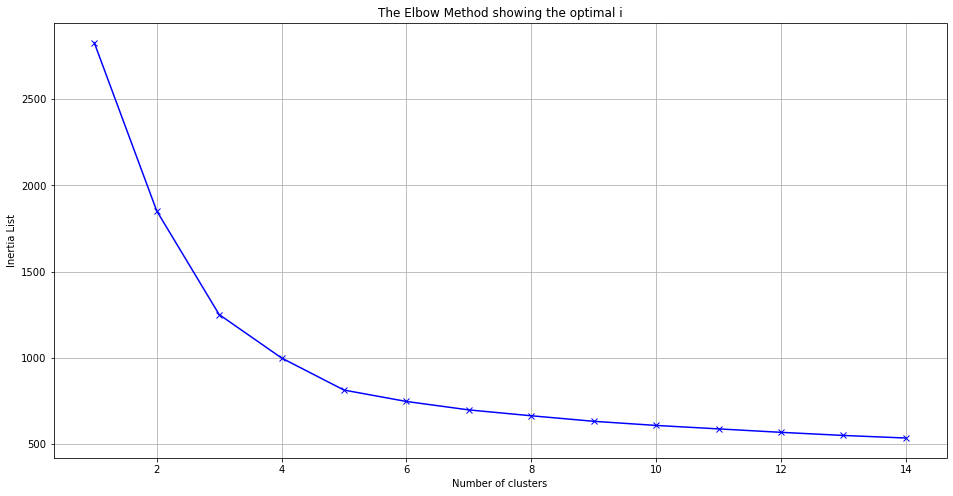

In [317]:
plt.figure(figsize=(16,8))
plt.plot(I, inertia_list, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia List')
plt.title('The Elbow Method showing the optimal i')
plt.grid()
plt.show()

## silhouette score

In [313]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_spotify_5000_df, scaled_kmeans.labels_) 

0.5972344648681651

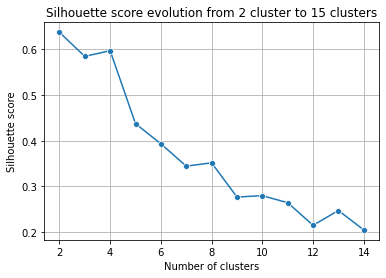

In [320]:
max_k = 15
sil_score = []


for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_spotify_5000_df).labels_
    sil_score.append(silhouette_score(scaled_spotify_5000_df, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show() 



In [318]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_spotify_sample_df, scaled_kmeans.labels_) 

0.6329713203010782

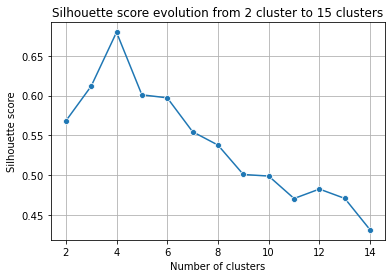

In [321]:
#scaled_spotify_sample_df
max_k = 15
sil_score = []


for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(scaled_spotify_sample_df).labels_
    sil_score.append(silhouette_score(scaled_spotify_sample_df, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')

sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid()
plt.show()

In [308]:
scaled_spotify_5000_df['cluster'] = clusters
scaled_spotify_5000_df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,1
1,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0
2,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0
3,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,1
4,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,1


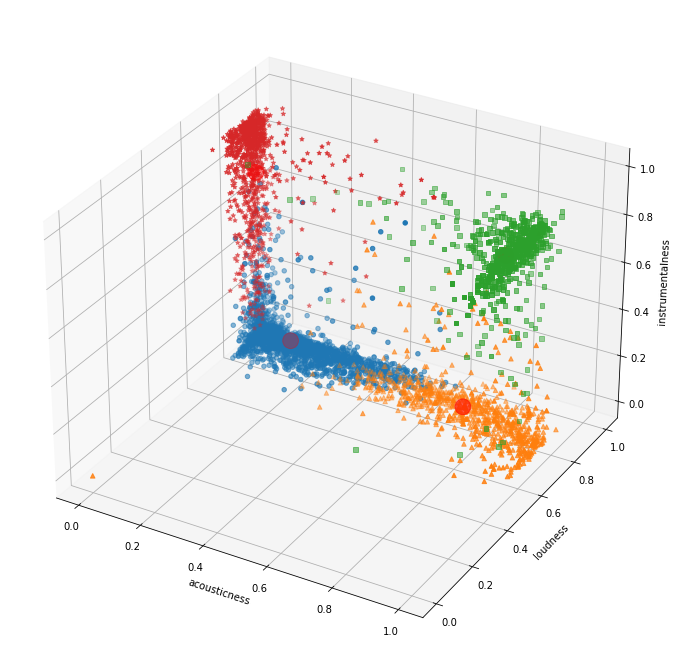

In [309]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b','s']
markers = ['o','^','s','*']
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for marker, d in scaled_spotify_5000_df.groupby('cluster'):
    ax.scatter(d['acousticness'], d['loudness'], d['instrumentalness'], marker=markers[marker], label=d['cluster'])
ax.scatter(centroids_df['acousticness'],centroids_df['loudness'],centroids_df['instrumentalness'], color='red', s=250)
ax.set_xlabel('acousticness')
ax.set_ylabel('loudness') 
ax.set_zlabel('instrumentalness')
plt.show() 

## creating new dataframe to include song-name and artists

In [260]:
#I first extracted the columns 'name' and 'artist' fom original dataframe and concated it with the scaled df 
name_artist = spotify_5000_df[["name", "artist"]]
scaled_spotify_5000_df = pd.concat([scaled_spotify_5000_df,name_artist], axis = 1)
scaled_spotify_5000_df.head()



,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster,name,artist
0,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,1,Se Eu Quiser Falar Com Deus ...,Gilberto Gil
1,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,3,Saudade De Bahia ...,Antônio Carlos Jobim
2,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,3,"Canta Canta, Minha Gente ...",Martinho Da Vila
3,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,1,Mulher Eu Sei ...,Chico César
4,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,1,Rosa Morena ...,Kurt Elling


In [266]:
#I then extracted the columns in list format for easy rearranging
cols = list(scaled_spotify_5000_df.columns.values)
cols

In [264]:
#I rearranged the columns to my preferref order
scaled_spotify_5000_df = scaled_spotify_5000_df[[ 'name',  'artist','danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'cluster'
]]

In [275]:
pd.set_option("display.max_colwidth", 300)
scaled_spotify_5000_df.head(5)

,name,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,1
1,Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,3
2,"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,3
3,Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,1
4,Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,1
